# Projeto de Analise do Perfil dos Eleitores Brasileiros com base nos dados abertos do TSE
### Fonte: https://dadosabertos.tse.jus.br/dataset/eleitorado-atual

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

## Análise inicial dos dados

In [2]:
tabela = pd.read_csv('perfil_eleitorado_ATUAL.csv', encoding='Latin 1', sep=';')
tabela.head(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,01/12/2022,17:45:04,9999,GO,93718,GOIANÉSIA,-1,#NULO#,74,2,...,1,SOLTEIRO,4549,45 a 49 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,382,371,1,0
1,01/12/2022,17:45:04,9999,GO,93718,GOIANÉSIA,-1,#NULO#,74,2,...,1,SOLTEIRO,5559,55 a 59 anos,6,ENSINO MÉDIO COMPLETO,35,34,0,0
2,01/12/2022,17:45:04,9999,GO,93718,GOIANÉSIA,-1,#NULO#,74,2,...,1,SOLTEIRO,6569,65 a 69 anos,7,SUPERIOR INCOMPLETO,2,2,0,0


In [3]:
tabela.shape

(4348565, 21)

In [4]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348565 entries, 0 to 4348564
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRIA        int64 
 7   DS_MUN_SIT_BIOMETRIA        object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

In [5]:
# listas dos itens da coluna por Gênero
tabela.DS_GENERO.unique()

array(['MASCULINO', 'FEMININO', 'NÃO INFORMADO'], dtype=object)

In [6]:
# listas dos itens da coluna por Estado Civil
tabela.DS_ESTADO_CIVIL.unique()

array(['SOLTEIRO', 'CASADO', 'VIÚVO', 'SEPARADO JUDICIALMENTE',
       'DIVORCIADO', 'NÃO INFORMADO'], dtype=object)

In [7]:
# listas dos itens da coluna por escolaridade
tabela.DS_GRAU_ESCOLARIDADE.unique()

array(['ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO MÉDIO COMPLETO',
       'SUPERIOR INCOMPLETO', 'LÊ E ESCREVE', 'ANALFABETO',
       'SUPERIOR COMPLETO', 'ENSINO FUNDAMENTAL COMPLETO',
       'ENSINO MÉDIO INCOMPLETO', 'NÃO INFORMADO'], dtype=object)

In [8]:
# listas dos itens da coluna por faixa etária
tabela.DS_FAIXA_ETARIA.unique()

array(['45 a 49 anos', '55 a 59 anos', '65 a 69 anos', '30 a 34 anos',
       '40 a 44 anos', '80 a 84 anos', '95 a 99 anos', '35 a 39 anos',
       '50 a 54 anos', '60 a 64 anos', '75 a 79 anos', '90 a 94 anos',
       '18 anos', '19 anos', '85 a 89 anos', '25 a 29 anos', '17 anos',
       '16 anos', '20 anos', '21 a 24 anos', '70 a 74 anos',
       '100 anos ou mais', 'Inválido'], dtype=object)

In [9]:
# Total de Unidades da Federação + o exterior
len(tabela.SG_UF.unique())

28

In [10]:
# Lista das Unidades da Federação + o exterior
tabela.SG_UF.unique()

array(['GO', 'MA', 'BA', 'MG', 'ES', 'DF', 'CE', 'AL', 'AM', 'AP', 'PB',
       'PA', 'PE', 'PI', 'MT', 'MS', 'PR', 'RJ', 'AC', 'RN', 'RS', 'RO',
       'SP', 'SC', 'SE', 'RR', 'TO', 'ZZ'], dtype=object)

## Caso tenha interesse em selecionar os dados por Estado:
### 1. Basta tirar o comentário da célula abaixo
### 2. Os dados do exterior são reprensetados pelo 'ZZ'

In [11]:
# print('Filtro por UF ')
# UF =  str.upper(input('Digite a sigla da UF: '))
# filter_UF = tabela.SG_UF==UF
# tabela = tabela[filter_UF]
# print(f'A Unidade da Federação Selecionada foi: {tabela.SG_UF.unique()}')


## Total de Eleitores

In [12]:
eleitores = f'{tabela.QT_ELEITORES_PERFIL.sum():,.0f}'
eleitores = eleitores.replace(',','.')
print(f'Total de Eleitores: {eleitores}')

Total de Eleitores: 156.145.292


## Análise dos Perfis dos Eleitores conforme dados do TSE

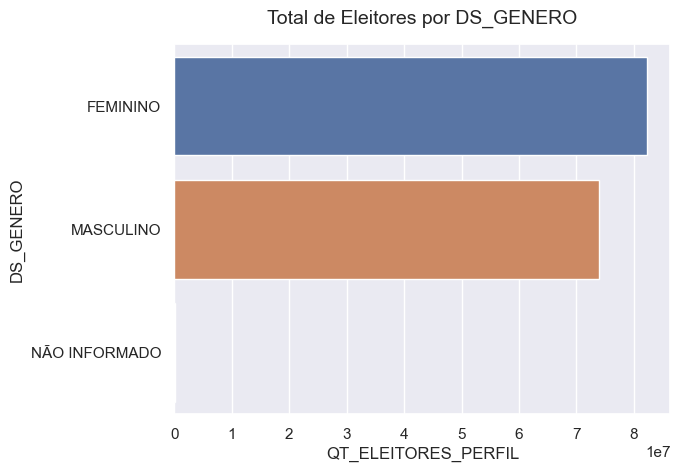

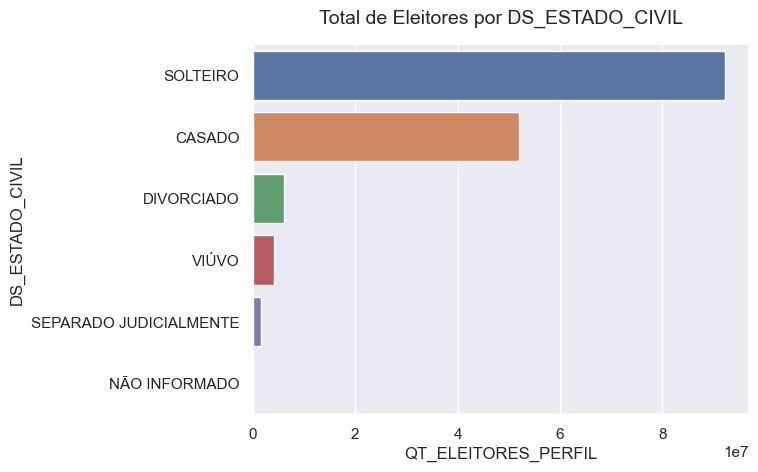

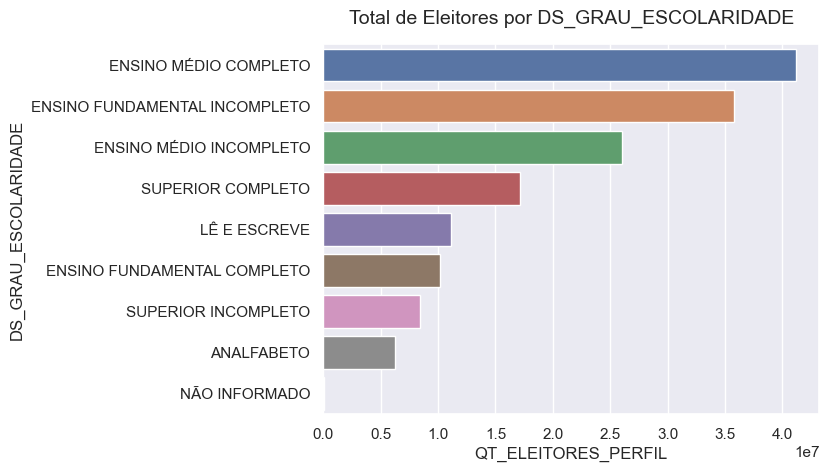

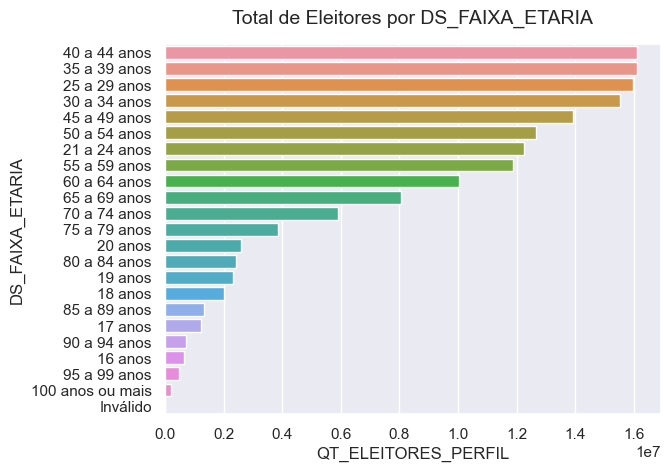

In [13]:
# Apresentando dados sobre Genero, Estado Civil, Escolaridade e Faixa Etária
atributos_group = tabela.groupby(['DS_GENERO','DS_ESTADO_CIVIL','DS_GRAU_ESCOLARIDADE',
                           'DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()
atributos_group = atributos_group.reset_index()

Atributos = ['DS_GENERO','DS_ESTADO_CIVIL','DS_GRAU_ESCOLARIDADE','DS_FAIXA_ETARIA',]
for grupo in Atributos:
    atributos_group = tabela.groupby([grupo])['QT_ELEITORES_PERFIL'].sum()
    atributos_group = atributos_group.reset_index()
    eleitor = atributos_group.sort_values(by='QT_ELEITORES_PERFIL',ascending=False)
    plt.title(f'Total de Eleitores por {grupo}', fontsize=14, pad=15)
    sns.barplot(y= eleitor[grupo], x=eleitor['QT_ELEITORES_PERFIL'])
    plt.show()


## Análise do Estado Civil, Escolaridade e Faixa Etária separados por Gênero

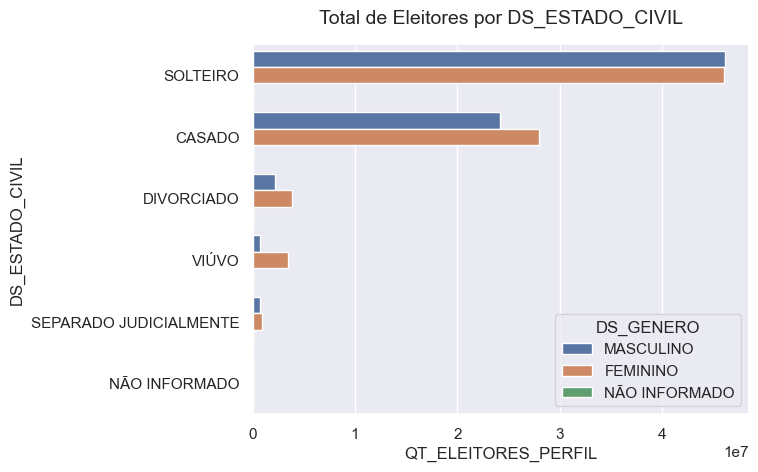

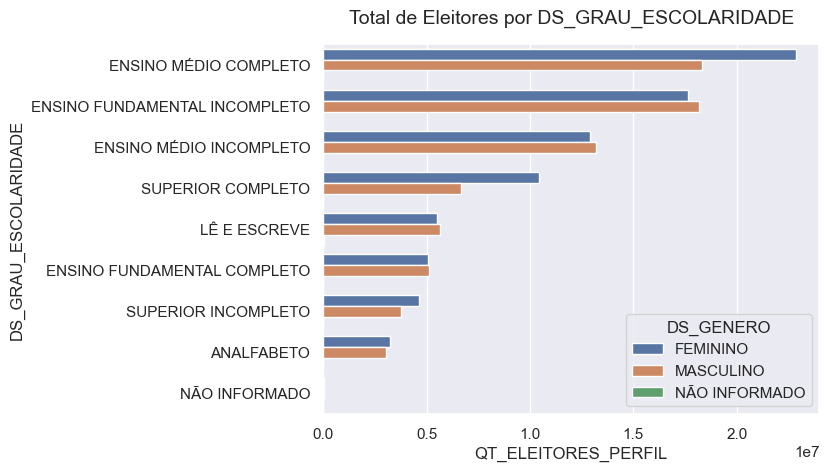

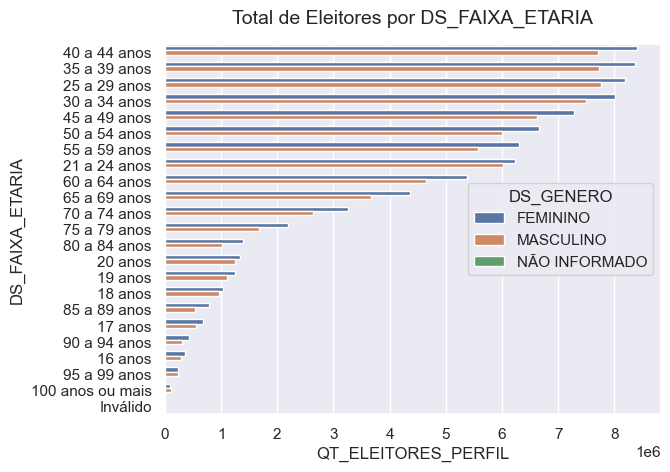

In [14]:
# Apresentando dados Estado Civil, Escolaridade e Faixa Etária separados por Gênero
atributos_group = tabela.groupby(['DS_GENERO','DS_ESTADO_CIVIL','DS_GRAU_ESCOLARIDADE',
                           'DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()
atributos_group = atributos_group.reset_index()

Atributos = ['DS_ESTADO_CIVIL','DS_GRAU_ESCOLARIDADE','DS_FAIXA_ETARIA',]
for grupo in Atributos:
    atributos_group = tabela.groupby([grupo,'DS_GENERO'])['QT_ELEITORES_PERFIL'].sum()
    atributos_group = atributos_group.reset_index()
    eleitor = atributos_group.sort_values(by='QT_ELEITORES_PERFIL',ascending=False)
    plt.title(f'Total de Eleitores por {grupo}', fontsize=14, pad=15)
    sns.barplot(y= eleitor[grupo], x=eleitor['QT_ELEITORES_PERFIL'], hue =eleitor['DS_GENERO'],)
    plt.show()
